In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_column', 100)

%matplotlib inline

In [241]:
mst_path = '../../datasets/mst/'
fig_path = '../../export/02_summary_stats_ped/'

In [242]:
df = pd.read_csv(mst_path + 'clean_ped.csv')
df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street
0,17560.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,4,7,0,1,2.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,11,0.0,0.0,0.0,0.0
1,17561.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0.0,0.0,0.0,0.0
2,17562.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,2,5,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,7,0.0,0.0,0.0,0.0
3,17563.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,1,3,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,4,0.0,0.0,0.0,0.0
4,17564.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,1,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0.0,0.0,0.0,0.0


# Identify problems with `date` and its distribution

Explore the data types of each column. Notice that the time column "date" is of type "object". Let's change that to datetime 

In [243]:
df['date'].dtype

dtype('O')

In [244]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes['date']

dtype('<M8[ns]')

In [245]:
# Observe that there are some nan values in the column date. We drop these rows
print("Number of nans in the date column:", df.isna().sum()['date'])
df = df.dropna(subset = ['date'])
df.index = range(len(df))
df.shape

Number of nans in the date column: 24


(2624, 35)

In [246]:
df.shape

(2624, 35)

In [247]:
# Explore the number of observations per year_month combinatino for the dataset
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: int(x.year))
df['yr_mo'] = [str(a)+'-'+str(b) for a,b in zip(df['year'], df['month'])]
df['yr_mo'].value_counts()

2017-4     512
2017-6     280
2017-5     264
2016-4     240
2016-12    208
2016-5     208
2016-10    184
2017-3     144
2017-1     144
2017-2     128
2016-11    112
2017-7      56
2016-9      56
2018-1      32
2018-7      24
2016-8      24
2017-8       8
Name: yr_mo, dtype: int64

It seems that 2017-01 to 2017-06 has most of the data points, so we focus on this period only. Note that you can totally make other assumptions and subset the data in another way! This is just what I am doing here.

In [248]:
# Subset the data for only this time range:
time_range = ['2017-' + str(i) for i in range(1,7)]
print("time_range", time_range)

# Subset the data and check how many obs. are left
df = df[df['yr_mo'].isin(time_range)]
df.shape

time_range ['2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6']


(1472, 38)

# Temporal Trend of Total Counts

In order to explore any trends, we need to aggregate the data somehow. For example, assume we want to group by `date` and find the `sum` and `mean` of the variable `total_count` on each day, we could use the `groupby` and `agg` functions to achieve this.

Also try play around with 
```
grouped = df.groupby('date').agg(['sum', 'mean']).reset_index()
grouped.head()
```

In [249]:
df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street,month,year,yr_mo
32,16254.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:00 PM,2,4,0,0,1,0,1.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,6,0.0,0.0,0.0,0.0,1,2017,2017-1
33,16255.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:15 PM,2,3,0,0,0,2,2.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,5,0.0,0.0,0.0,0.0,1,2017,2017-1
34,16256.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:30 PM,0,1,0,0,0,0,1.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,1,0.0,0.0,0.0,0.0,1,2017,2017-1
35,16257.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,4:45 PM,1,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,1,0.0,0.0,0.0,0.0,1,2017,2017-1
36,16258.0,1030.0,Durfee Ave.,Thienes Ave.,Rush St.,34.043525,-118.032415,2017-01-17,Tuesday,4:00 PM,6:00 PM,5:00 PM,1,1,0,0,1,0,0.0,manual_in_house,no,none,none,none,principalArterial,35.0,neighborhoodRetail,133.0,SEM,2017-02-07 13:31:00,2,0.0,0.0,0.0,0.0,1,2017,2017-1


In [250]:
len(df['date'].unique())

51

In [251]:
grouped = df.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
grouped.head()

,date,sum,mean
0,2017-01-10,16,1.0000
1,2017-01-15,53,3.3125
2,2017-01-17,51,3.1875
3,2017-01-24,161,10.0625
4,2017-01-26,90,11.2500


Let's try plotting the average total count per day. Note that this doesn't tell us anything useful, as we did not take into account the number of volunteers availabe!! Try deleting or adding back the last few functions (`plt.xticks`, `plt.xlabel`) and observe the difference. 

Text(0.5, 1.0, 'Average total_count by date')

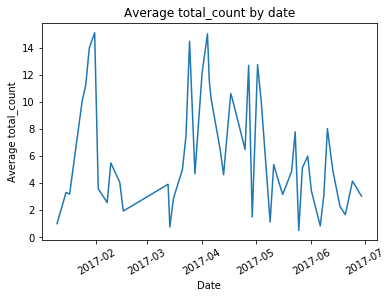

In [252]:
plt.plot(grouped['date'], grouped['mean'])
plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Average total_count')
plt.title("Average total_count by date")

Assume we only want to look at two cities, we could subset the datasets and do the same thing as above. Note that the below commands examines the two cities with most number of observations.

In [253]:
# Find which ciplt.xticks(rotation = 30)
# plt.xlabel('Date') ties has most number of observations
cities = df['city'].value_counts().sort_values(ascending = False)
cities.head()

Duarte                     168
Altadena                   144
Mt. SAC/Cal Poly/Walnut    128
Pomona                     104
Arcadia                     96
Name: city, dtype: int64

In [254]:
# Extract the two top cities:
top_cities = cities.index[:5]
top_cities

Index(['Duarte', 'Altadena', 'Mt. SAC/Cal Poly/Walnut', 'Pomona', 'Arcadia'], dtype='object')

In [255]:
# We will proceed with Glendora and SEM
dua = df[df['city'] == 'Duarte']
alt = df[df['city'] == 'Altadena']
mts = df[df['city'] == 'Mt. SAC/Cal Poly/Walnut']
pom = df[df['city'] == 'Pomona']
arc = df[df['city'] == 'Arcadia']
print(dua.shape)
print(alt.shape)
print(mts.shape)
print(pom.shape)
print(arc.shape)

(168, 38)
(144, 38)
(128, 38)
(104, 38)
(96, 38)


In [256]:
# Perform the same groupby commands
dua_group = dua.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
alt_group = alt.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
mts_group = dua.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
pom_group = pom.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
arc_group = arc.groupby('date').agg(['sum', 'mean'])['total_count'].reset_index()
dua_group
alt_group
mts_group
pom_group
arc_group


,date,sum,mean
0,2017-04-01,870,36.2500
1,2017-04-05,93,11.6250
2,2017-04-17,85,10.6250
3,2017-05-02,119,7.4375
4,2017-05-04,212,26.5000
5,2017-05-11,107,6.6875
6,2017-05-23,140,8.7500


Text(0.5, 1.0, 'Average total_count by date')

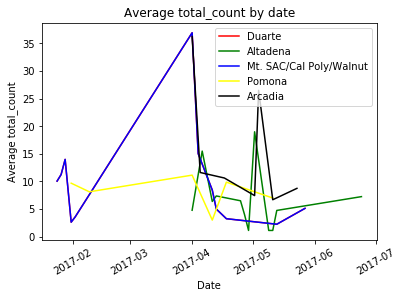

In [257]:
plt.plot(dua_group['date'], dua_group['mean'], color = 'red', label = 'Duarte')
plt.plot(alt_group['date'], alt_group['mean'], color = 'green', label = 'Altadena')
plt.plot(mts_group['date'], mts_group['mean'], color = 'blue', label = 'Mt. SAC/Cal Poly/Walnut')
plt.plot(pom_group['date'], pom_group['mean'], color = 'yellow', label = 'Pomona')
plt.plot(arc_group['date'], arc_group['mean'], color = 'black', label = 'Arcadia')
plt.xticks(rotation = 30)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average total_count')
plt.title("Average total_count by date")

Gotta say this looks pretty bad... Now try select cities with most number of dates

In [258]:
city_ndate = df.groupby('city')['date'].nunique().sort_values(ascending = False)
city_ndate.head()

city
Altadena                   12
Duarte                     12
Mt. SAC/Cal Poly/Walnut     8
E. Pasadena                 7
Rowland Heights             7
Name: date, dtype: int64

Now you could perform the same analysis as above on these cities. I will not repeat that again.

# Temporal Trends of One Variable: Percentage of Female riders

In [259]:
# Create two time series - female and total
female = df.groupby('date').agg(['sum'])['female'].reset_index()
total = df.groupby('date').agg(['sum'])['total_count'].reset_index()
print(female.shape)
print(total.shape)

female.head()

(51, 2)
(51, 2)


,date,sum
0,2017-01-10,0.0
1,2017-01-15,0.0
2,2017-01-17,0.0
3,2017-01-24,0.0
4,2017-01-26,0.0


In [260]:
# We change the columns and merge these two datasets together
female.columns = ['date', 'female']
total.columns = ['date', 'total_count']
female.head()

,date,female
0,2017-01-10,0.0
1,2017-01-15,0.0
2,2017-01-17,0.0
3,2017-01-24,0.0
4,2017-01-26,0.0


In [261]:
merged = pd.merge(female, total, on = 'date', how = 'inner')
merged.shape

(51, 3)

In [262]:
merged.head()

,date,female,total_count
0,2017-01-10,0.0,16
1,2017-01-15,0.0,53
2,2017-01-17,0.0,51
3,2017-01-24,0.0,161
4,2017-01-26,0.0,90


In [263]:
# Explore female percentage changes - create a new column called female_perc
merged['female_perc'] = merged['female'] / merged['total_count']
merged.head()

,date,female,total_count,female_perc
0,2017-01-10,0.0,16,0.0
1,2017-01-15,0.0,53,0.0
2,2017-01-17,0.0,51,0.0
3,2017-01-24,0.0,161,0.0
4,2017-01-26,0.0,90,0.0


Text(0, 0.5, 'Female Percentage')

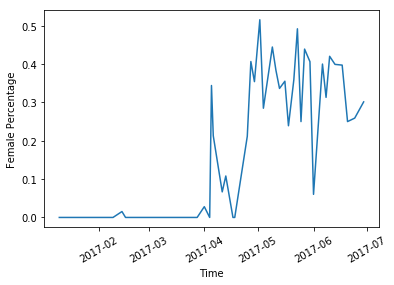

In [264]:
# Naive time plot 
plt.plot(merged['date'], merged['female_perc'])
plt.xticks(rotation = 30)
plt.xlabel('Time')
plt.ylabel('Female Percentage')

## Notice that the curve remained 0 for a long time, this is probably that the female data is not collected on this time period.

# Temporal Trends of One Variable: Day of Week

In [265]:
day_of_week = df.groupby('weekday').agg(['sum'])['total_count'].reset_index()
print(day_of_week.shape)
print(total.shape)

day_of_week.head()

(6, 2)
(51, 2)


,weekday,sum
0,Monday,179
1,Saturday,3911
2,Sunday,53
3,Thursday,2489
4,Tuesday,4037


In [266]:
day_of_week.columns = ['weekday', 'total_count']
day_of_week.head()

,weekday,total_count
0,Monday,179
1,Saturday,3911
2,Sunday,53
3,Thursday,2489
4,Tuesday,4037


In [267]:
total_riders = day_of_week['total_count'].sum()
total_riders

10762

In [268]:
day_of_week = day_of_week.reindex(columns=['weekday', 'total_count', 'weekday_perc'])
day_of_week[['weekday_perc']] = day_of_week['total_count'] / total_riders
day_of_week

,weekday,total_count,weekday_perc
0,Monday,179,0.016633
1,Saturday,3911,0.363408
2,Sunday,53,0.004925
3,Thursday,2489,0.231277
4,Tuesday,4037,0.375116
5,Wednesday,93,0.008642


Text(0, 0.5, 'Weekday Percentage')

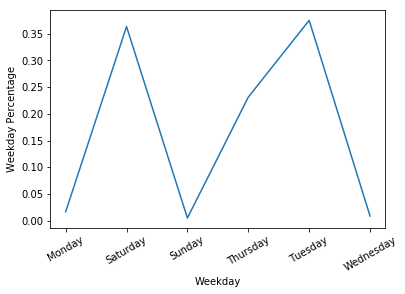

In [269]:
# Naive time plot 
plt.plot(day_of_week['weekday'], day_of_week['weekday_perc'])
plt.xticks(rotation = 30)
plt.xlabel('Weekday')
plt.ylabel('Weekday Percentage')

# Ratio Comparison of Pedestrians and Bikers

In [270]:
bike_ds_path = "../../datasets/mst/clean_bike.csv"
ped_ds_path = "../../datasets/mst/clean_ped.csv"

In [271]:
bike_df = pd.read_csv(bike_ds_path)
ped_df = pd.read_csv(ped_ds_path)

In [272]:
ped_df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street
0,17560.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,4,7,0,1,2.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,11,0.0,0.0,0.0,0.0
1,17561.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0.0,0.0,0.0,0.0
2,17562.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,2,5,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,7,0.0,0.0,0.0,0.0
3,17563.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,1,3,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,4,0.0,0.0,0.0,0.0
4,17564.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,1,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0.0,0.0,0.0,0.0


In [273]:
bike_df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,female,sidewalk,wrongway,count_method,count_bikesonsidewalks,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,no_helmet,child
0,19203.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,0,1,0,0,1.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,1,0
1,19204.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
2,19205.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
3,19206.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,2,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,2,0,0
4,19207.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0,0


In [274]:
bike_df.loc[(bike_df['street1'] == 'Workman Mill Road') & (bike_df['street2'] == 'Peck Rd.') & (bike_df['street3'] == 'College Dr'), 'location_id'] = 1824
ped_df.loc[(ped_df['street1'] == 'Workman Mill Road') & (ped_df['street2'] == 'Peck Rd.') & (ped_df['street3'] == 'College Dr'), 'location_id'] = 1824


bike_df.loc[(bike_df['street1'] == 'Barranca Ave') & (bike_df['street2'] == 'Badillo St') & (bike_df['street3'] == 'E Algrove St'), 'location_id'] = 1924
ped_df.loc[(ped_df['street1'] == 'Barranca Ave') & (ped_df['street2'] == 'Badillo St') & (ped_df['street3'] == 'E Algrove St'), 'location_id'] = 1924

In [275]:
ped_filtered = ped_df[['date', 'location_id', 'interval_begin', 'total_count']]
bike_filtered = bike_df[['date', 'location_id', 'interval_begin', 'total_count']]
ped_filtered.head()
bike_filtered.head()

,date,location_id,interval_begin,total_count
0,12-03-2016,1025.0,11:00 AM,1
1,12-03-2016,1025.0,11:15 AM,1
2,12-03-2016,1025.0,11:30 AM,1
3,12-03-2016,1025.0,11:45 AM,2
4,12-03-2016,1025.0,12:00 PM,0


In [276]:
bike_filtered.head()

,date,location_id,interval_begin,total_count
0,12-03-2016,1025.0,11:00 AM,1
1,12-03-2016,1025.0,11:15 AM,1
2,12-03-2016,1025.0,11:30 AM,1
3,12-03-2016,1025.0,11:45 AM,2
4,12-03-2016,1025.0,12:00 PM,0


In [277]:
# merge the bike and ped dataframes together with inner join
merged = bike_filtered.merge(ped_filtered, how='inner', on=['date', 'location_id', 'interval_begin'])

# rename columns
merged = merged.rename(mapper={'total_count_x': 'bike_count', 'total_count_y': 'ped_count'}, axis=1)

# add totals, percentage columns
merged['total'] = merged['bike_count'] + merged['ped_count']
merged.head()

,date,location_id,interval_begin,bike_count,ped_count,total
0,12-03-2016,1025.0,11:00 AM,1,11,12
1,12-03-2016,1025.0,11:15 AM,1,0,1
2,12-03-2016,1025.0,11:30 AM,1,7,8
3,12-03-2016,1025.0,11:45 AM,2,4,6
4,12-03-2016,1025.0,12:00 PM,0,1,1


In [278]:
# Use the date and interval_begin column to make a datetime column
merged['date'] = pd.to_datetime(merged['date'])
merged.head()

,date,location_id,interval_begin,bike_count,ped_count,total
0,2016-12-03,1025.0,11:00 AM,1,11,12
1,2016-12-03,1025.0,11:15 AM,1,0,1
2,2016-12-03,1025.0,11:30 AM,1,7,8
3,2016-12-03,1025.0,11:45 AM,2,4,6
4,2016-12-03,1025.0,12:00 PM,0,1,1


In [279]:
# merge on location id and date (we don't need it)
merged_on_day = merged.groupby(by='date').mean()
merged_on_day = merged_on_day.drop('location_id', axis=1)
merged_on_day.head()

,bike_count,ped_count,total
date,,,
2016-04-14,1.000000,10.375000,11.375000
2016-04-16,3.956522,3.652174,7.608696
2016-04-19,1.612903,5.290323,6.903226
2016-04-21,1.208333,3.604167,4.812500
2016-04-23,1.875000,6.200000,8.075000


In [280]:
# adding percentages
merged_on_day['bike_percent'] = merged_on_day['bike_count'] / merged_on_day['total'] 
merged_on_day['ped_percent'] = merged_on_day['ped_count'] / merged_on_day['total']
merged_on_day.head()

,bike_count,ped_count,total,bike_percent,ped_percent
date,,,,,
2016-04-14,1.000000,10.375000,11.375000,0.087912,0.912088
2016-04-16,3.956522,3.652174,7.608696,0.520000,0.480000
2016-04-19,1.612903,5.290323,6.903226,0.233645,0.766355
2016-04-21,1.208333,3.604167,4.812500,0.251082,0.748918
2016-04-23,1.875000,6.200000,8.075000,0.232198,0.767802


In [281]:
merged_on_day[merged_on_day["ped_count"] > 500]

,bike_count,ped_count,total,bike_percent,ped_percent
date,,,,,


# Visualizations

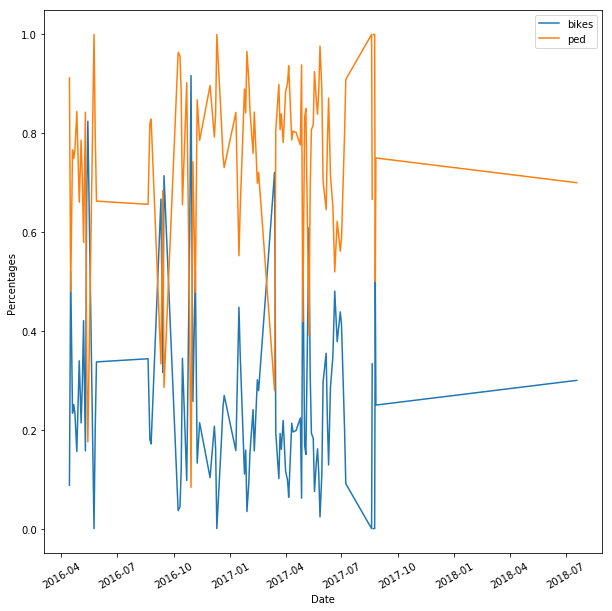

In [282]:
plt.figure(figsize=(10, 10))

plt.plot(merged_on_day['bike_percent'], label='bikes')
plt.plot(merged_on_day['ped_percent'], label='ped')

plt.xlabel('Date')
plt.ylabel('Percentages')

plt.xticks(rotation = 30)

plt.legend()
plt.show()

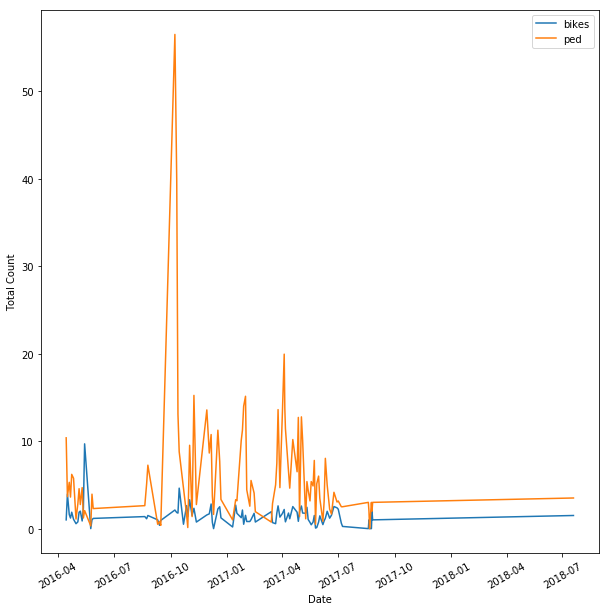

In [327]:
plt.figure(figsize=(10, 10))

plt.plot(merged_on_day['bike_count'], label='bikes')
plt.plot(merged_on_day['ped_count'], label='ped')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Total Count')

plt.legend()
plt.show()

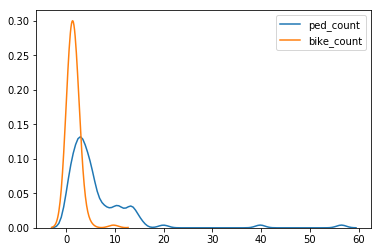

In [284]:
sns.kdeplot(merged_on_day['ped_count'], bw=1, cumulative=False)
sns.kdeplot(merged_on_day['bike_count'], bw=1, cumulative=False)

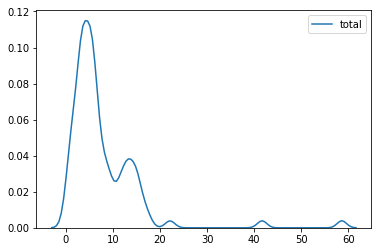

In [285]:
sns.kdeplot(merged_on_day['total'], bw=1, cumulative=False)

In [286]:
# bike ratio, bike + ped / bike

In [287]:
# deadline is new years
# bar graph for major cities, y axis is bike ratio

In [288]:
bike_ds_path = "../../datasets/mst/clean_bike.csv"
ped_ds_path = "../../datasets/mst/clean_ped.csv"

In [289]:
bike_df = pd.read_csv(bike_ds_path)
ped_df = pd.read_csv(ped_ds_path)

In [290]:
ped_df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street
0,17560.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,4,7,0,1,2.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,11,0.0,0.0,0.0,0.0
1,17561.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,0,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0.0,0.0,0.0,0.0
2,17562.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,2,5,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,7,0.0,0.0,0.0,0.0
3,17563.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,1,3,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,4,0.0,0.0,0.0,0.0
4,17564.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,1,0,0,0,0.0,manual_in_house,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0.0,0.0,0.0,0.0


In [291]:
bike_df.head()

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,female,sidewalk,wrongway,count_method,count_bikesonsidewalks,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,no_helmet,child
0,19203.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:00 AM,0,0,0,1,0,0,1.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,1,0
1,19204.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:15 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
2,19205.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:30 AM,0,0,1,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,1,0,0
3,19206.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,11:45 AM,0,0,2,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,2,0,0
4,19207.0,1025.0,Durfee Ave.,Santa Anita Ave.,Peck Rd.,34.035943,-118.039993,12-03-2016,Saturday,11:00 AM,1:00 AM,12:00 PM,0,0,0,0,0,0,0.0,manual_in_house,1,no,none,none,none,minorArterial,40.0,neighborhoodRetail,133.0,SEM,2017-07-17 15:08:00,0,0,0


In [292]:
ped_filtered = ped_df[['date', 'city', 'interval_begin', 'total_count']]
bike_filtered = bike_df[['date', 'city', 'interval_begin', 'total_count']]
ped_filtered.head()

,date,city,interval_begin,total_count
0,12-03-2016,SEM,11:00 AM,11
1,12-03-2016,SEM,11:15 AM,0
2,12-03-2016,SEM,11:30 AM,7
3,12-03-2016,SEM,11:45 AM,4
4,12-03-2016,SEM,12:00 PM,1


In [293]:
df[df['city'].isin(['Duarte', 'Altadena', 'Mt. SAC/Cal Poly/Walnut', 'Pomona', 'Arcadia'])]

,intervalid,location_id,street1,street2,street3,latitude,longitude,date,weekday,period_begin,period_end,interval_begin,ns,sn,ew,we,specialneeds,skate,child,count_method,raining,unusual,bikewaytype,bikewaytype_options,road_class,speed_limit,landuse,pk_dataset_id,city,createdatetime,total_count,female,cane,dog,on_street,month,year,yr_mo
1168,16711.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,4:00 PM,6:00 PM,4:00 PM,0,0,3,20,1,0,1.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:06:00,23,0.0,0.0,0.0,0.0,4,2017,2017-4
1169,16712.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,4:00 PM,6:00 PM,4:15 PM,0,0,7,7,1,0,1.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:06:00,14,0.0,0.0,0.0,0.0,4,2017,2017-4
1170,16713.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,4:00 PM,6:00 PM,4:30 PM,0,0,6,3,0,0,0.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:06:00,9,0.0,0.0,0.0,0.0,4,2017,2017-4
1171,16714.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,4:00 PM,6:00 PM,4:45 PM,0,0,13,2,1,1,3.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:06:00,15,0.0,0.0,0.0,0.0,4,2017,2017-4
1172,16715.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,4:00 PM,6:00 PM,5:00 PM,0,0,11,15,2,0,8.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:06:00,26,0.0,0.0,0.0,0.0,4,2017,2017-4
1173,16716.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,4:00 PM,6:00 PM,5:15 PM,0,0,3,11,2,0,8.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:06:00,14,0.0,0.0,0.0,0.0,4,2017,2017-4
1174,16717.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,4:00 PM,6:00 PM,5:30 PM,0,0,10,3,0,1,0.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:06:00,13,0.0,0.0,0.0,0.0,4,2017,2017-4
1175,16718.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,4:00 PM,6:00 PM,5:45 PM,0,0,15,5,0,0,5.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:06:00,20,0.0,0.0,0.0,0.0,4,2017,2017-4
1176,16727.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,11:00 AM,1:00 PM,11:00 AM,0,0,12,10,1,0,3.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:24:00,22,9.0,0.0,0.0,1.0,4,2017,2017-4
1177,16728.0,1551.0,E Washington Blvd,N Dominion Ave,Allen Ave,34.169051,-118.113507,2017-04-06,Thursday,11:00 AM,1:00 PM,11:15 AM,0,0,5,16,0,0,0.0,manual_in_house,no,none,none,none,principalArterial,35.0,cbd,135.0,Altadena,2017-04-21 13:24:00,21,9.0,0.0,0.0,1.0,4,2017,2017-4


In [294]:
bike_filtered = bike_filtered[bike_filtered['city'].isin(['Duarte', 'Altadena', 'Mt. SAC/Cal Poly/Walnut', 'Pomona', 'Arcadia'])]
ped_filtrered = ped_filtered[ped_filtered['city'].isin(['Duarte', 'Altadena', 'Mt. SAC/Cal Poly/Walnut', 'Pomona', 'Arcadia'])]
bike_filtered.head()

,date,city,interval_begin,total_count
736,08-20-2016,Pomona,11:00 AM,1
737,08-20-2016,Pomona,11:15 AM,0
738,08-20-2016,Pomona,11:30 AM,1
739,08-20-2016,Pomona,11:45 AM,4
740,08-20-2016,Pomona,12:00 PM,4


In [295]:
ped_filtrered.head()

,date,city,interval_begin,total_count
736,08-20-2016,Pomona,11:00 AM,2
737,08-20-2016,Pomona,11:15 AM,5
738,08-20-2016,Pomona,11:30 AM,5
739,08-20-2016,Pomona,11:45 AM,0
740,08-20-2016,Pomona,12:00 PM,0


In [296]:
# merge the bike and ped dataframes together with inner join
merged = bike_filtered.merge(ped_filtered, how='inner', on=['date', 'city', 'interval_begin'])

# rename columns
merged = merged.rename(mapper={'total_count_x': 'bike_count', 'total_count_y': 'ped_count'}, axis=1)

# add totals, percentage columns
merged['total'] = merged['bike_count'] + merged['ped_count']
merged.head()

,date,city,interval_begin,bike_count,ped_count,total
0,08-20-2016,Pomona,11:00 AM,1,2,3
1,08-20-2016,Pomona,11:15 AM,0,5,5
2,08-20-2016,Pomona,11:30 AM,1,5,6
3,08-20-2016,Pomona,11:45 AM,4,0,4
4,08-20-2016,Pomona,12:00 PM,4,0,4


In [297]:
# Use the date and interval_begin column to make a datetime column
merged['date'] = pd.to_datetime(merged['date'])
merged.head()

,date,city,interval_begin,bike_count,ped_count,total
0,2016-08-20,Pomona,11:00 AM,1,2,3
1,2016-08-20,Pomona,11:15 AM,0,5,5
2,2016-08-20,Pomona,11:30 AM,1,5,6
3,2016-08-20,Pomona,11:45 AM,4,0,4
4,2016-08-20,Pomona,12:00 PM,4,0,4


In [298]:
# merge on location id and date (we don't need it)
merged_on_day_avg = merged.groupby(by=['city','date']).mean()
#merged_on_day = merged_on_day.drop('city', axis=1)
merged_on_day_avg.head()

bike_count  ped_count      total
city     date                                        
Altadena 2017-04-01    0.852941   6.264706   7.117647
         2017-04-06    0.562500  15.812500  16.375000
         2017-04-11    0.125000   6.375000   6.500000
         2017-04-13    0.875000   7.375000   8.250000
         2017-04-25    1.875000   6.500000   8.375000

In [299]:
merged_on_day_avg['ped_percent'] = merged_on_day_avg['ped_count'] / merged_on_day_avg['total']
merged_on_day_avg['bike_percent'] = merged_on_day_avg['bike_count'] / merged_on_day_avg['total']
merged_on_day_avg['bike_ratio'] = (merged_on_day_avg['bike_count'] + merged_on_day_avg['ped_count']) / merged_on_day_avg['bike_count']  
merged_on_day_abs.head()


bike_count  ped_count  total  ped_percent  bike_percent  \
city     date                                                                  
Altadena 2017-04-01          29        213    242     0.880165      0.119835   
         2017-04-06          18        506    524     0.965649      0.034351   
         2017-04-11           1         51     52     0.980769      0.019231   
         2017-04-13           7         59     66     0.893939      0.106061   
         2017-04-25          15         52     67     0.776119      0.223881   

                     bike_ratio  
city     date                    
Altadena 2017-04-01    8.344828  
         2017-04-06   29.111111  
         2017-04-11   52.000000  
         2017-04-13    9.428571  
         2017-04-25    4.466667

In [300]:
# merge on location id and date (we don't need it)
merged_on_day_abs = merged.groupby(by=['city','date']).sum()
#merged_on_day = merged_on_day.drop('city', axis=1)
merged_on_day_abs.head()

bike_count  ped_count  total
city     date                                    
Altadena 2017-04-01          29        213    242
         2017-04-06          18        506    524
         2017-04-11           1         51     52
         2017-04-13           7         59     66
         2017-04-25          15         52     67

In [301]:
merged_on_day_abs['ped_percent'] = merged_on_day_abs['ped_count'] / merged_on_day_abs['total']
merged_on_day_abs['bike_percent'] = merged_on_day_abs['bike_count'] / merged_on_day_abs['total']
merged_on_day_abs['bike_ratio'] = (merged_on_day_abs['bike_count'] + merged_on_day_abs['ped_count']) / merged_on_day_abs['bike_count']  
merged_on_day_abs.head()

bike_count  ped_count  total  ped_percent  bike_percent  \
city     date                                                                  
Altadena 2017-04-01          29        213    242     0.880165      0.119835   
         2017-04-06          18        506    524     0.965649      0.034351   
         2017-04-11           1         51     52     0.980769      0.019231   
         2017-04-13           7         59     66     0.893939      0.106061   
         2017-04-25          15         52     67     0.776119      0.223881   

                     bike_ratio  
city     date                    
Altadena 2017-04-01    8.344828  
         2017-04-06   29.111111  
         2017-04-11   52.000000  
         2017-04-13    9.428571  
         2017-04-25    4.466667

In [302]:
merged_on_day_abs[~(merged_on_day_abs['ped_percent'] == merged_on_day_avg['ped_percent'])]

bike_count  ped_count  total  ped_percent  \
city                    date                                                    
Altadena                2017-04-01          29        213    242     0.880165   
                        2017-05-13           8         23     31     0.741935   
Arcadia                 2017-04-01         342       3960   4302     0.920502   
Mt. SAC/Cal Poly/Walnut 2017-05-18           9         92    101     0.910891   
Pomona                  2017-04-01         383       1450   1833     0.791053   

                                    bike_percent  bike_ratio  
city                    date                                  
Altadena                2017-04-01      0.119835    8.344828  
                        2017-05-13      0.258065    3.875000  
Arcadia                 2017-04-01      0.079498   12.578947  
Mt. SAC/Cal Poly/Walnut 2017-05-18      0.089109   11.222222  
Pomona                  2017-04-01      0.208947    4.785901

In [303]:
merged_on_day_avg[~(merged_on_day_abs['ped_percent'] == merged_on_day_avg['ped_percent'])]

bike_count  ped_count      total  \
city                    date                                           
Altadena                2017-04-01    0.852941   6.264706   7.117647   
                        2017-05-13    1.600000   4.600000   6.200000   
Arcadia                 2017-04-01    3.800000  44.000000  47.800000   
Mt. SAC/Cal Poly/Walnut 2017-05-18    0.375000   3.833333   4.208333   
Pomona                  2017-04-01    2.659722  10.069444  12.729167   

                                    ped_percent  bike_percent  bike_ratio  
city                    date                                               
Altadena                2017-04-01     0.880165      0.119835    8.344828  
                        2017-05-13     0.741935      0.258065    3.875000  
Arcadia                 2017-04-01     0.920502      0.079498   12.578947  
Mt. SAC/Cal Poly/Walnut 2017-05-18     0.910891      0.089109   11.222222  
Pomona                  2017-04-01     0.791053      0.208947    4.785901

In [388]:
po = merged_on_day_avg.loc[['Pomona']]
po.index = po.index.droplevel(0)

alt = merged_on_day_avg.loc[['Altadena']]
alt.index = alt.index.droplevel(0)

mt = merged_on_day_avg.loc[['Mt. SAC/Cal Poly/Walnut']]
mt.index = mt.index.droplevel(0)

dua = merged_on_day_avg.loc[['Duarte']]
dua.index = dua.index.droplevel(0)

arc = merged_on_day_avg.loc[['Arcadia']]
arc.index = arc.index.droplevel(0)



,bike_count,ped_count,total,ped_percent,bike_percent,bike_ratio
date,,,,,,
2017-04-01,0.852941,6.264706,7.117647,0.880165,0.119835,8.344828
2017-04-06,0.562500,15.812500,16.375000,0.965649,0.034351,29.111111
2017-04-11,0.125000,6.375000,6.500000,0.980769,0.019231,52.000000
2017-04-13,0.875000,7.375000,8.250000,0.893939,0.106061,9.428571
2017-04-25,1.875000,6.500000,8.375000,0.776119,0.223881,4.466667
2017-04-27,0.500000,4.000000,4.500000,0.888889,0.111111,9.000000
2017-04-29,2.250000,1.125000,3.375000,0.333333,0.666667,1.500000
2017-05-02,1.812500,19.000000,20.812500,0.912913,0.087087,11.482759
2017-05-09,1.750000,1.125000,2.875000,0.391304,0.608696,1.642857


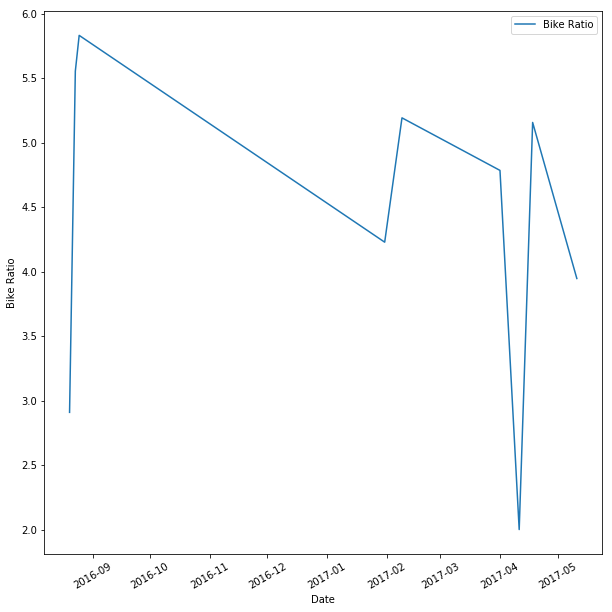

In [386]:
plt.figure(figsize=(10, 10))

plt.plot(po['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()



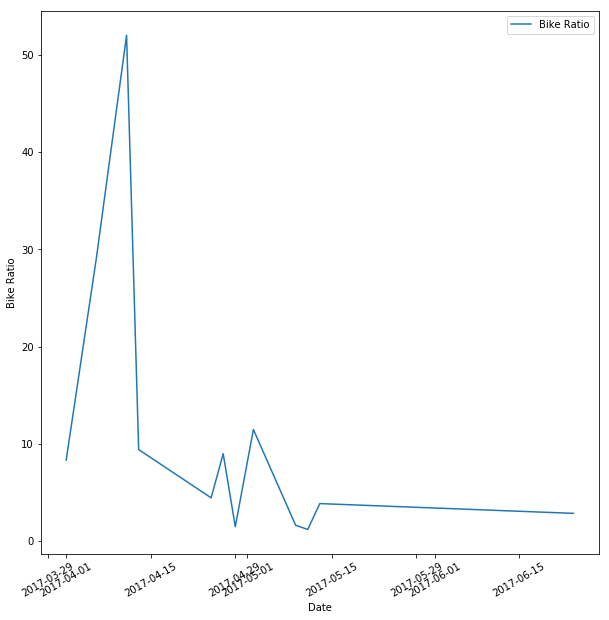

In [394]:
plt.figure(figsize=(10, 10))

plt.plot(alt['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

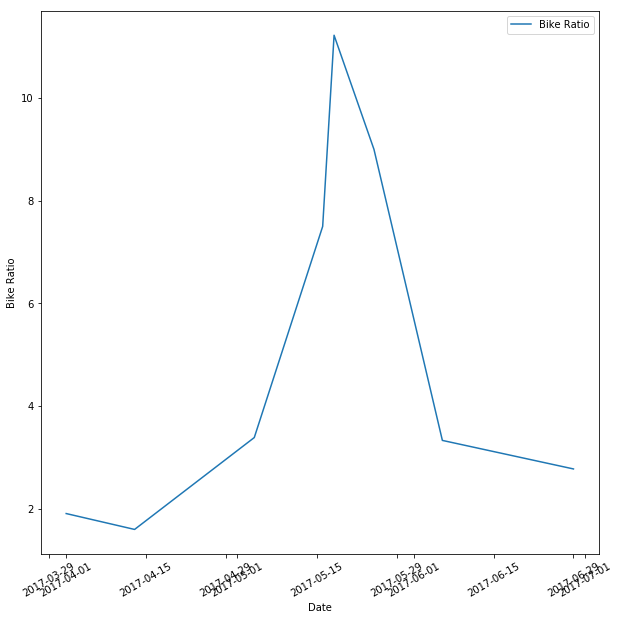

In [391]:
plt.figure(figsize=(10, 10))

plt.plot(mt['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

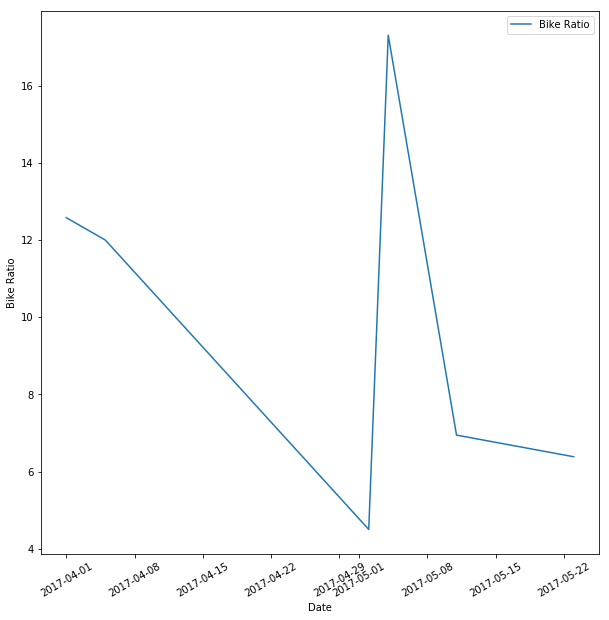

In [392]:
plt.figure(figsize=(10, 10))

plt.plot(arc['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()

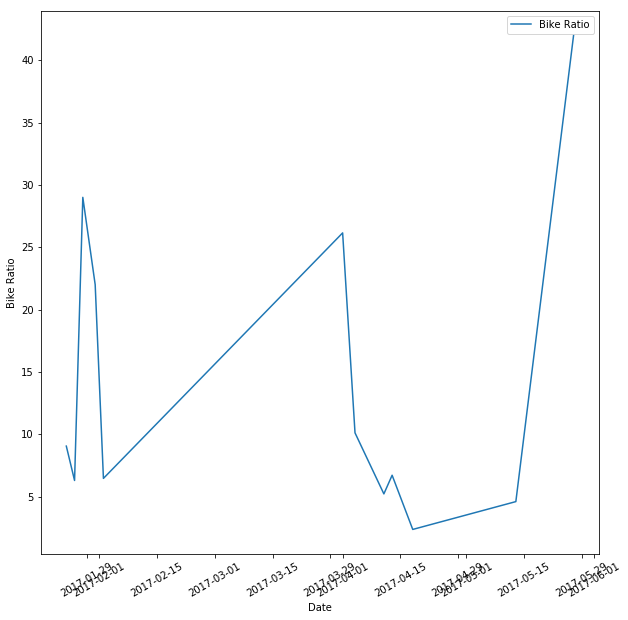

In [393]:
plt.figure(figsize=(10, 10))

plt.plot(dua['bike_ratio'], label='Bike Ratio')

plt.xticks(rotation = 30)
plt.xlabel('Date')
plt.ylabel('Bike Ratio')

plt.legend()
plt.show()